In [1]:
# uses python3

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter

from datetime import datetime, timedelta
from datetime import date

import warnings
warnings.filterwarnings("ignore")

font = {'weight' : 'bold',
        'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)

Matplotlib created a temporary config/cache directory at /var/folders/kn/6vcxdq1n7vx9jw9h7tdw68d00000gp/T/matplotlib-pxnwhfiy because the default path (/Users/oibragim/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv('conposcovidloc.csv')  

In [3]:
# Converting the column to a data format:
df['Accurate_Episode_Date'] =  pd.to_datetime(df['Accurate_Episode_Date'])

In [4]:
def output_trends(dataframe=df,
                  city='Toronto',
                  case_resolution='Resolved',
                  trend_data=30,
                  days_omitted=8):
    '''
    city -- one of the population_dict cities
    case_resolution - "Resolved", "Not Resolved", "Fatal"
    trend_data - how many days
    days_omitted - how many days do we skip (from today)
    '''
   
    data = df.copy()

    # Days:

    end_date = date.today() - timedelta(days=days_omitted)
    start_date = date.today() - timedelta(days=trend_data+days_omitted)

    # Considering only specified range of dates:
    df_current = data[data["Accurate_Episode_Date"].isin(
        pd.date_range(start_date, end_date))]

    # Output df:
    df_out = df_current[df_current['Outcome1'] ==
                        case_resolution][df_current['Reporting_PHU_City'] == city]
    out = df_out.groupby('Accurate_Episode_Date').nunique()
    out = out.sort_values(by=['Accurate_Episode_Date'])['Row_ID']

    return out

In [5]:
def how_many(dataframe=df,
             city='Toronto',
             trend_data=30,
             case_resolution='Resolved',
             days_omitted=0):
    '''
    description
    '''
    population_dict = {
        'Windsor': 336000,
        'Barrie': 145614,
        'Port Hope': 16753,
        'London': 5454141,
        'Toronto': 2731571,
        'Hamilton': 767000,
        'Whitby': 128377,
        'Thorold': 21663,
        'Newmarket': 90000,
        'Cornwall': 46589,
        'Oakville': 193832,
        'Kingston': 590940,
        'Point Edward': 2037,
        'Ottawa': 934243,
        'Mississauga': 733083,
        'Waterloo': 562000,
        'Guelph': 120545,
        'Stratford': 31500,
        'St. Thomas': 38909,
        'Chatham': 103700,
        'Simcoe': 13922,
        'Brantford': 115000,
        'Thunder Bay': 121621,
        'New Liskeard': 4402,
        'Brockville': 21900,
        'Peterborough': 202259,
        'Timmins': 41788,
        'North Bay': 51027,
        'Sudbury': 161531,
        'Belleville': 50716,
        'Pembroke': 15260,
        'Sault Ste. Marie': 75528,
        'Owen Sound': 21341,
        'Kenora': 15696}

    data = df.copy()

    out = data[data['Reporting_PHU_City'] == city]
    out.keys()

    # Fatal:
    out_fatal = out[out['Outcome1'] == 'Fatal']
    out_fatal = out_fatal.groupby('Accurate_Episode_Date').nunique()
    num_fatal = np.sum(out_fatal['Row_ID'].to_numpy())

    # Resolved:
    out_resolved = out[out['Outcome1'] == 'Resolved']
    out_resolved = out_resolved.groupby('Accurate_Episode_Date').nunique()
    num_resolved = np.sum(out_resolved['Row_ID'].to_numpy())

    # Not Resolved:
    out_not_resolved = out[out['Outcome1'] == 'Not Resolved']
    out_not_resolved = out_not_resolved.groupby(
        'Accurate_Episode_Date').nunique()
    num_not_resolved = np.sum(out_not_resolved['Row_ID'].to_numpy())

    # Got COVID total:
    out = out.groupby('Accurate_Episode_Date').nunique()
    num_sick = np.sum(out['Row_ID'].to_numpy())

    # ---------------------------------------------------------------
    # Days:
    end_date = date.today() - timedelta(days=days_omitted)
    start_date = date.today() - timedelta(days=trend_data+days_omitted)

    # Considering only specified range of dates:
    df_current = data[data["Accurate_Episode_Date"].isin(
        pd.date_range(start_date, end_date))]

    # Output df:
    df_out = df_current[df_current['Reporting_PHU_City'] == city]

    out1 = df_out.groupby('Accurate_Episode_Date').nunique()
    num_sick_past = np.sum(out1['Row_ID'].to_numpy())
    
    # Risk factor:
    risk_factor = 100*num_not_resolved*np.power(population_dict[city], 1/3)/(1.8*(population_dict[city]))
    
    # Print info:

    print("Destination:\t\t\t\t{}".format(city))
    print("{} population:\t\t\t{:,}".format(city, population_dict[city]))
    print("Total number of cases:\t\t\t{:,}".format(num_sick))
    print("Total number of fatal cases:\t\t{:,}".format(num_fatal))
    print("Total number of resolved cases:\t\t{:,}".format(num_resolved))
    print("Cases for the past {} days:\t\t{:,}".format(
        trend_data, num_sick_past))
    print(
        "Total number of non-resolved cases:\t{:,}".format(num_not_resolved))
    print("Risk factor:\t\t\t\t{:.2f}%".format(risk_factor))
    
#     return population_dict[city], num_sick, num_fatal, num_resolved, num_sick_past, num_not_resolved, risk_factor

In [6]:
how_many(city = "Waterloo")

Destination:				Waterloo
Waterloo population:			562,000
Total number of cases:			7,990
Total number of fatal cases:		180
Total number of resolved cases:		6,822
Cases for the past 30 days:		2,735
Total number of non-resolved cases:	988
Risk factor:				8.06%


In [7]:
how_many(city = 'Simcoe')

Destination:				Simcoe
Simcoe population:			13,922
Total number of cases:			1,139
Total number of fatal cases:		41
Total number of resolved cases:		968
Cases for the past 30 days:		325
Total number of non-resolved cases:	130
Risk factor:				12.48%


In [8]:
how_many(city = "Toronto")

Destination:				Toronto
Toronto population:			2,731,571
Total number of cases:			71,936
Total number of fatal cases:		2,117
Total number of resolved cases:		61,242
Cases for the past 30 days:		18,312
Total number of non-resolved cases:	8,577
Risk factor:				24.38%


In [9]:
how_many(city = "Ottawa")

Destination:				Ottawa
Ottawa population:			934,243
Total number of cases:			11,976
Total number of fatal cases:		400
Total number of resolved cases:		10,213
Cases for the past 30 days:		2,585
Total number of non-resolved cases:	1,363
Risk factor:				7.92%


In [10]:
population_dict = {
        'Windsor': 336000,
        'Barrie': 145614,
        'Port Hope': 16753,
        'London': 5454141,
        'Toronto': 2731571,
        'Hamilton': 767000,
        'Whitby': 128377,
        'Thorold': 21663,
        'Newmarket': 90000,
        'Cornwall': 46589,
        'Oakville': 193832,
        'Kingston': 590940,
        'Point Edward': 2037,
        'Ottawa': 934243,
        'Mississauga': 733083,
        'Waterloo': 562000,
        'Guelph': 120545,
        'Stratford': 31500,
        'St. Thomas': 38909,
        'Chatham': 103700,
        'Simcoe': 13922,
        'Brantford': 115000,
        'Thunder Bay': 121621,
        'New Liskeard': 4402,
        'Brockville': 21900,
        'Peterborough': 202259,
        'Timmins': 41788,
        'North Bay': 51027,
        'Sudbury': 161531,
        'Belleville': 50716,
        'Pembroke': 15260,
        'Sault Ste. Marie': 75528,
        'Owen Sound': 21341,
        'Kenora': 15696}

In [11]:
# for i in population_dict.keys():
#     how_many(city = i)
#     print('==================')

In [12]:
g = np.datetime64('2005-02-25')

In [13]:
print( g)

2005-02-25


In [14]:
def output_trends(dataframe=df,
                  city='Toronto',
#                   case_resolution='Resolved',
                  trend_data=30,
                  days_omitted=8):
    '''
    city -- one of the population_dict cities
    case_resolution - "Resolved", "Not Resolved", "Fatal"
    trend_data - how many days
    days_omitted - how many days do we skip (from today)
    '''
   
    data = df.copy()

    # Days:
    
    end_date = date.today() - timedelta(days=days_omitted)
    start_date = date.today() - timedelta(days=trend_data+days_omitted)

    # Considering only specified range of dates:
    df_current = data[data["Accurate_Episode_Date"].isin(
        pd.date_range(start_date, end_date))]
    print(data.size)
    print(df_current.size)

    # Output df:
    df_out = df_current[df_current['Reporting_PHU_City'] == city]
    out = df_out.groupby('Accurate_Episode_Date').nunique()
    out = out.sort_values(by=['Accurate_Episode_Date'])['Row_ID']

    return out

In [15]:
def output_trends(dataframe=df,
                  city='Toronto',
#                   case_resolution='Resolved',
                  trend_data=60,
                  days_omitted=8):
    '''
    city -- one of the population_dict cities
    case_resolution - "Resolved", "Not Resolved", "Fatal"
    trend_data - how many days
    days_omitted - how many days do we skip (from today)
    '''
   
    data = df.copy()

    # Days:
    
    end_date = date.today() - timedelta(days=days_omitted)
    start_date = date.today() - timedelta(days=trend_data+days_omitted)

    # Considering only specified range of dates:
    df_current = data[data["Accurate_Episode_Date"].isin(
        pd.date_range(start_date, end_date))]

    # Output df:
    df_out = df_current[df_current['Reporting_PHU_City'] == city]
    out = df_out.groupby('Accurate_Episode_Date').nunique()
    out = out.sort_values(by=['Accurate_Episode_Date'])['Row_ID']
    
    #Linear Regression
    value = out.to_numpy()
    X = np.array(list(range(len(value)))).reshape(-1, 1)
    model = LinearRegression().fit(X, value)
    prediction = "INCR" if model.coef_ > 0 else "DECR"
    
    #Dates:
    dates = out.index
    #Values:
    values = savgol_filter(out.to_numpy(), 7,2)
    #Linear regression predictions:
    lin_reg_pred = [model.coef_*x + model.intercept_ for x in range(len(value))]
    
    return dates, values, lin_reg_pred, model.coef_

In [16]:
def how_many(dataframe=df,
             city='Toronto',
             trend_data=30,
             case_resolution='Resolved',
             means_of_transport = 'Bus',
             days_omitted=0):
    '''
    means_of_transport = 'Bus'+10%, 'Flight'+15%, 'Car'+0%
    '''
    population_dict = {
        'Windsor': 336000,
        'Barrie': 145614,
        'Port Hope': 16753,
        'London': 5454141,
        'Toronto': 2731571,
        'Hamilton': 767000,
        'Whitby': 128377,
        'Thorold': 21663,
        'Newmarket': 90000,
        'Cornwall': 46589,
        'Oakville': 193832,
        'Kingston': 590940,
        'Point Edward': 2037,
        'Ottawa': 934243,
        'Mississauga': 733083,
        'Waterloo': 562000,
        'Guelph': 120545,
        'Stratford': 31500,
        'St. Thomas': 38909,
        'Chatham': 103700,
        'Simcoe': 13922,
        'Brantford': 115000,
        'Thunder Bay': 121621,
        'New Liskeard': 4402,
        'Brockville': 21900,
        'Peterborough': 202259,
        'Timmins': 41788,
        'North Bay': 51027,
        'Sudbury': 161531,
        'Belleville': 50716,
        'Pembroke': 15260,
        'Sault Ste. Marie': 75528,
        'Owen Sound': 21341,
        'Kenora': 15696}

    data = df.copy()

    out = data[data['Reporting_PHU_City'] == city]
    out.keys()

    # Fatal:
    out_fatal = out[out['Outcome1'] == 'Fatal']
    out_fatal = out_fatal.groupby('Accurate_Episode_Date').nunique()
    num_fatal = np.sum(out_fatal['Row_ID'].to_numpy())

    # Resolved:
    out_resolved = out[out['Outcome1'] == 'Resolved']
    out_resolved = out_resolved.groupby('Accurate_Episode_Date').nunique()
    num_resolved = np.sum(out_resolved['Row_ID'].to_numpy())

    # Not Resolved:
    out_not_resolved = out[out['Outcome1'] == 'Not Resolved']
    out_not_resolved = out_not_resolved.groupby(
        'Accurate_Episode_Date').nunique()
    num_not_resolved = np.sum(out_not_resolved['Row_ID'].to_numpy())

    # Got COVID total:
    out = out.groupby('Accurate_Episode_Date').nunique()
    num_sick = np.sum(out['Row_ID'].to_numpy())

    # ---------------------------------------------------------------
    # Days:
    end_date = date.today() - timedelta(days=days_omitted)
    start_date = date.today() - timedelta(days=trend_data+days_omitted)

    # Considering only specified range of dates:
    df_current = data[data["Accurate_Episode_Date"].isin(
        pd.date_range(start_date, end_date))]

    # Output df:
    df_out = df_current[df_current['Reporting_PHU_City'] == city]

    out1 = df_out.groupby('Accurate_Episode_Date').nunique()
    num_sick_past = np.sum(out1['Row_ID'].to_numpy())
    
    
    _, _, _, coef = output_trends(city = city)
    
    # Risk factor:
    risk_factor = 100*(num_not_resolved*np.power(population_dict[city], 1/3)+coef[0]*30000)/(1.8*(population_dict[city]))
    
    if risk_factor >= 100:
        risk_factor = 99.99
    elif risk_factor <= 0:
        risk_factor = 1.00
    #     risk_factor = 100*(num_not_resolved*np.power(population_dict[city], 1/3))/(1.8*(population_dict[city]))
    
    if means_of_transport == 'Bus':
        risk_factor+=10
        if risk_factor >= 100:
            risk_factor = 99.99
    elif means_of_transport == 'Flight':
        risk_factor+=15
        if risk_factor >= 100:
            risk_factor = 99.99    
        
        
    
    # Print info:

    print("Destination:\t\t\t\t{}".format(city))
    print("{} population:\t\t\t{:,}".format(city, population_dict[city]))
    print("Total number of cases:\t\t\t{:,}".format(num_sick))
    print("Total number of fatal cases:\t\t{:,}".format(num_fatal))
    print("Total number of resolved cases:\t\t{:,}".format(num_resolved))
    print("Cases for the past {} days:\t\t{:,}".format(
        trend_data, num_sick_past))
    print(
        "Total number of non-resolved cases:\t{:,}".format(num_not_resolved))
    print("Risk factor:\t\t\t\t{:.2f}%".format(risk_factor))
    
#     return population_dict[city], num_sick, num_fatal, num_resolved, num_sick_past, num_not_resolved, risk_factor

In [17]:
    population_dict = {
        'Windsor': 336000,
        'Barrie': 145614,
        'Port Hope': 16753,
        'London': 5454141,
        'Toronto': 2731571,
        'Hamilton': 767000,
        'Whitby': 128377,
        'Thorold': 21663,
        'Newmarket': 90000,
        'Cornwall': 46589,
        'Oakville': 193832,
        'Kingston': 590940,
        'Point Edward': 2037,
        'Ottawa': 934243,
        'Mississauga': 733083,
        'Waterloo': 562000,
        'Guelph': 120545,
        'Stratford': 31500,
        'St. Thomas': 38909,
        'Chatham': 103700,
        'Simcoe': 13922,
        'Brantford': 115000,
        'Thunder Bay': 121621,
        'New Liskeard': 4402,
        'Brockville': 21900,
        'Peterborough': 202259,
        'Timmins': 41788,
        'North Bay': 51027,
        'Sudbury': 161531,
        'Belleville': 50716,
        'Pembroke': 15260,
        'Sault Ste. Marie': 75528,
        'Owen Sound': 21341,
        'Kenora': 15696}

In [18]:
population_dict.keys()

dict_keys(['Windsor', 'Barrie', 'Port Hope', 'London', 'Toronto', 'Hamilton', 'Whitby', 'Thorold', 'Newmarket', 'Cornwall', 'Oakville', 'Kingston', 'Point Edward', 'Ottawa', 'Mississauga', 'Waterloo', 'Guelph', 'Stratford', 'St. Thomas', 'Chatham', 'Simcoe', 'Brantford', 'Thunder Bay', 'New Liskeard', 'Brockville', 'Peterborough', 'Timmins', 'North Bay', 'Sudbury', 'Belleville', 'Pembroke', 'Sault Ste. Marie', 'Owen Sound', 'Kenora'])

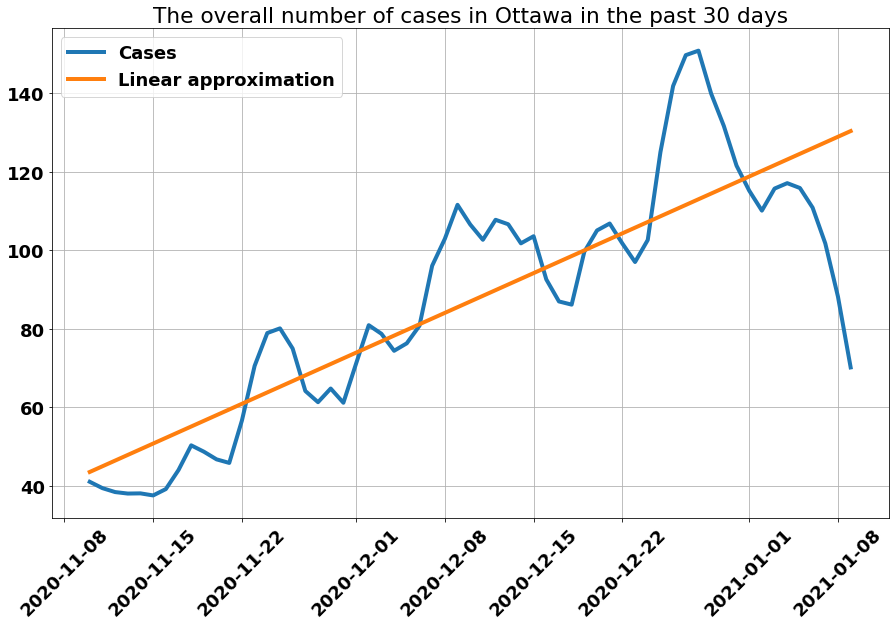

Destination:				Ottawa
Ottawa population:			934,243
Total number of cases:			11,976
Total number of fatal cases:		400
Total number of resolved cases:		10,213
Cases for the past 30 days:		2,585
Total number of non-resolved cases:	1,363
Risk factor:				10.53%


In [34]:
city_name = 'Ottawa'
transport = 'Car'

dates, values, lin_reg_pred, coef = output_trends(city = 'Hamilton')

plt.figure(figsize=(15,9))
plt.plot(dates,values, linewidth = 4, label = 'Cases')
plt.plot(dates,lin_reg_pred, linewidth = 4, label ='Linear approximation')
plt.xticks(rotation=45)
plt.legend()
plt.title("The overall number of cases in {} in the past 30 days".format(city_name))
plt.grid()
plt.show()

how_many(city=city_name, means_of_transport = transport)